In [16]:
import textblob as TextBlob 
from textblob import Sentence
from pathlib import Path 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import string
import re 
import pandas as pd
from collections import Counter

In [2]:
movies  = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
movie_reviews = movies['review_content']
movie_reviews
#translator = str.maketrans('','',str.punctuation)
#movie_reviews_cleaned = movie_reviews.translate(translator)
#print(movie_reviews_cleaned.lower())

0          A fantasy adventure that fuses Greek mythology...
1          Uma Thurman as Medusa, the gorgon with a coiff...
2          With a top-notch cast and dazzling special eff...
3          Whether audiences will get behind The Lightnin...
4          What's really lacking in The Lightning Thief i...
                                 ...                        
1130012                                                  NaN
1130013    Seen today, it's not only a startling indictme...
1130014    A rousing visual spectacle that's a prequel of...
1130015    A simple two-act story: Prelude to war, and th...
1130016    Rides the line between being a pure artifact o...
Name: review_content, Length: 1130017, dtype: object

In [2]:
movie_reviews = (movies_[['review_content']], ascending=False)
movie_reviews

SyntaxError: invalid syntax (1438241901.py, line 1)

In [4]:
movie_str = str(movie_reviews)
movie_str

'[\'A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will thrill to the visual spectacle\'\n \'Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching fantasy\'\n \'With a top-notch cast and dazzling special effects, this will tide the teens over until the next Harry Potter instalment.\'\n ...\n "A rousing visual spectacle that\'s a prequel of the Cy Endfield directed Zulu (1964)."\n \'A simple two-act story: Prelude to war, and the war. The former is concerned with a lot of British derring-do and priggish behavior. The latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have.\'\n \'Rides the line between being a pure artifact of a bygone era-one that depicts a romanticized, unrealistic version of the time-and a modern, revisionist take that strives f

In [5]:
#convert to lower case text
movie_text_cleaned = movie_str.lower()
movie_text_cleaned

'[\'a fantasy adventure that fuses greek mythology to contemporary american places and values. anyone around 15 (give or take a couple of years) will thrill to the visual spectacle\'\n \'uma thurman as medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching fantasy\'\n \'with a top-notch cast and dazzling special effects, this will tide the teens over until the next harry potter instalment.\'\n ...\n "a rousing visual spectacle that\'s a prequel of the cy endfield directed zulu (1964)."\n \'a simple two-act story: prelude to war, and the war. the former is concerned with a lot of british derring-do and priggish behavior. the latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have.\'\n \'rides the line between being a pure artifact of a bygone era-one that depicts a romanticized, unrealistic version of the time-and a modern, revisionist take that strives f

In [6]:
# Removing the twitter usernames from tweet string
movie_text_cleaned=re.sub(r'@\w+', ' ', movie_text_cleaned)
movie_text_cleaned

'[\'a fantasy adventure that fuses greek mythology to contemporary american places and values. anyone around 15 (give or take a couple of years) will thrill to the visual spectacle\'\n \'uma thurman as medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching fantasy\'\n \'with a top-notch cast and dazzling special effects, this will tide the teens over until the next harry potter instalment.\'\n ...\n "a rousing visual spectacle that\'s a prequel of the cy endfield directed zulu (1964)."\n \'a simple two-act story: prelude to war, and the war. the former is concerned with a lot of british derring-do and priggish behavior. the latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have.\'\n \'rides the line between being a pure artifact of a bygone era-one that depicts a romanticized, unrealistic version of the time-and a modern, revisionist take that strives f

In [7]:
# Removing the URLS from the tweet string
movie_text_cleaned=re.sub(r'http\S+', ' ', movie_text_cleaned)
movie_text_cleaned

'[\'a fantasy adventure that fuses greek mythology to contemporary american places and values. anyone around 15 (give or take a couple of years) will thrill to the visual spectacle\'\n \'uma thurman as medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching fantasy\'\n \'with a top-notch cast and dazzling special effects, this will tide the teens over until the next harry potter instalment.\'\n ...\n "a rousing visual spectacle that\'s a prequel of the cy endfield directed zulu (1964)."\n \'a simple two-act story: prelude to war, and the war. the former is concerned with a lot of british derring-do and priggish behavior. the latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have.\'\n \'rides the line between being a pure artifact of a bygone era-one that depicts a romanticized, unrealistic version of the time-and a modern, revisionist take that strives f

In [8]:
# Deleting everything which is not characters
movie_text_cleaned = re.sub(r'[^a-z A-Z]', ' ',movie_text_cleaned)
movie_text_cleaned

'  a fantasy adventure that fuses greek mythology to contemporary american places and values  anyone around     give or take a couple of years  will thrill to the visual spectacle    uma thurman as medusa  the gorgon with a coiffure of writhing snakes and stone inducing hypnotic gaze is one of the highlights of this bewitching fantasy    with a top notch cast and dazzling special effects  this will tide the teens over until the next harry potter instalment          a rousing visual spectacle that s a prequel of the cy endfield directed zulu            a simple two act story  prelude to war  and the war  the former is concerned with a lot of british derring do and priggish behavior  the latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have     rides the line between being a pure artifact of a bygone era one that depicts a romanticized  unrealistic version of the time and a modern  revisionist take that strives for a more accura

In [9]:
# Deleting any word which is less than 3-characters mostly those are stopwords
movie_text_cleaned = re.sub(r'\b\w{1,2}\b', '', movie_text_cleaned)
movie_text_cleaned

'   fantasy adventure that fuses greek mythology  contemporary american places and values  anyone around     give  take  couple  years  will thrill  the visual spectacle    uma thurman  medusa  the gorgon with  coiffure  writhing snakes and stone inducing hypnotic gaze  one  the highlights  this bewitching fantasy    with  top notch cast and dazzling special effects  this will tide the teens over until the next harry potter instalment           rousing visual spectacle that   prequel  the  endfield directed zulu             simple two act story  prelude  war  and the war  the former  concerned with  lot  british derring  and priggish behavior  the latter consists  battle scenes with  lot  kinetic energy but not  much emotional punch  they should have     rides the line between being  pure artifact   bygone era one that depicts  romanticized  unrealistic version  the time and  modern  revisionist take that strives for  more accurate portrayal  historical reality   '

In [10]:
# Stripping extra spaces in the text
movie_text_cleaned= re.sub(r' +', ' ', movie_text_cleaned)
movie_text_cleaned

' fantasy adventure that fuses greek mythology contemporary american places and values anyone around give take couple years will thrill the visual spectacle uma thurman medusa the gorgon with coiffure writhing snakes and stone inducing hypnotic gaze one the highlights this bewitching fantasy with top notch cast and dazzling special effects this will tide the teens over until the next harry potter instalment rousing visual spectacle that prequel the endfield directed zulu simple two act story prelude war and the war the former concerned with lot british derring and priggish behavior the latter consists battle scenes with lot kinetic energy but not much emotional punch they should have rides the line between being pure artifact bygone era one that depicts romanticized unrealistic version the time and modern revisionist take that strives for more accurate portrayal historical reality '

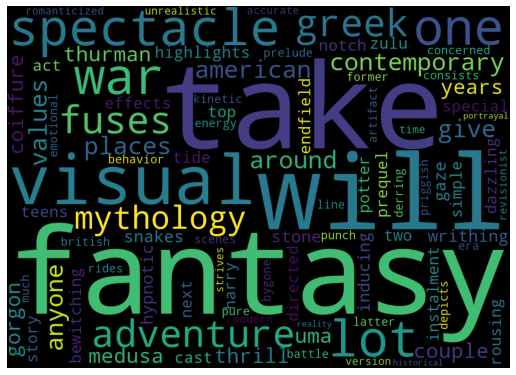

In [12]:
wc = WordCloud(max_words=100,
               max_font_size=500, 
               font_step=2, 
               stopwords=STOPWORDS, 
               background_color='black', 
               width=1000,
               height=720).generate(movie_text_cleaned)

plt.figure(figsize=(9,9))
plt.axis("off")
plt.imshow(wc)
plt.show()

